In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pdb

from sklearn.datasets import make_regression
from matplotlib import pyplot

c:\python64\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [244]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


def plot_data(x, t):
    plt.scatter(x, t, marker='o', c="k", s=20)


def plot_truth(x, y, label='Truth'):
    plt.plot(x, y, 'go', label=label)


def plot_predictive(x, y, std, y_label='Prediction', std_label='Uncertainty', plot_xy_labels=True):
    y = y.ravel()
    std = std.ravel()

    plt.plot(x, y,'*', label=y_label)
    plt.fill_between(x.ravel(), y + std, y - std, alpha = 0.5, label=std_label)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')
        
        
def plot_posterior(mean, cov, w0, w1):
    resolution = 500

    grid_x = grid_y = np.linspace(-1, 1, resolution)
    grid_flat = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)

    densities = stats.multivariate_normal.pdf(grid_flat, mean=mean.ravel(), cov=cov).reshape(resolution, resolution)
    plt.imshow(densities, origin='lower', extent=(-1, 1, -1, 1))
    plt.scatter(w0, w1, marker='x', c="g", s=280, label='Truth')

    plt.xlabel('w0')
    plt.ylabel('w1')

def plot_posterior_samples(x, ys, plot_xy_labels=True):
    plt.plot(x, ys[:, 0], 'r-', alpha=0.5, label='Post. samples')
    for i in range(1, ys.shape[1]):
        plt.plot(x, ys[:, i], 'r-', alpha=0.5)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')

def print_comparison(title, a, b, a_prefix='np', b_prefix='br'):
    print(title)
    print('-' * len(title))
    print(f'{a_prefix}:', a)
    print(f'{b_prefix}:', b)


In [129]:
def posterior(x,y,beta,pr_mean,pr_cov):
    pos_cov = np.linalg.inv(pr_cov+beta*(x.T@x))
    temp = np.linalg.inv(pr_cov)@pr_mean+beta*(x.T@y)
    pos_mean = pos_cov@temp
    return pos_mean,pos_cov


def posterior_predictive(x,pos_mean,pos_var,beta):
    mean = x@pos_mean
    variance = (1/beta)+np.sum(x@pos_var*x,axis=1)
    return mean,variance

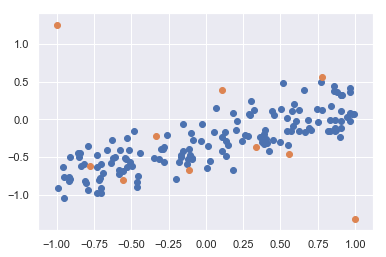

In [246]:

beta = 25
alpha = 2.0

train_size = 150
test_size = 10

a = -0.3
b = 0.5

x = np.random.rand(train_size,) * 2 - 1
x = np.sort(x)
y = a + b * x + np.random.normal(scale=np.sqrt(1/beta), size=train_size)

x_test = np.linspace(-1, 1, test_size).reshape(-1)
y_test = a + b * x_test + np.random.normal(scale=1, size=test_size)

pyplot.scatter(x,y)
pyplot.scatter(x_test,y_test)

pyplot.show()

In [247]:
coef,bias

(5, 3)

In [248]:
y = y.reshape(-1,1)
x = x.reshape(-1,1)
x = np.concatenate([np.ones(x.shape[0]).reshape(-1,1),x],axis=1)

y_test = y_test.reshape(-1,1)
x_test = x_test.reshape(-1,1)
x_test = np.concatenate([np.ones(x_test.shape[0]).reshape(-1,1),x_test],axis=1)

In [250]:
N=10

x_train = x[:N,:].copy()
y_train = y[:N,:].copy()


In [251]:
x_test.shape,y_test.shape,y.shape

((10, 2), (10, 1), (150, 1))

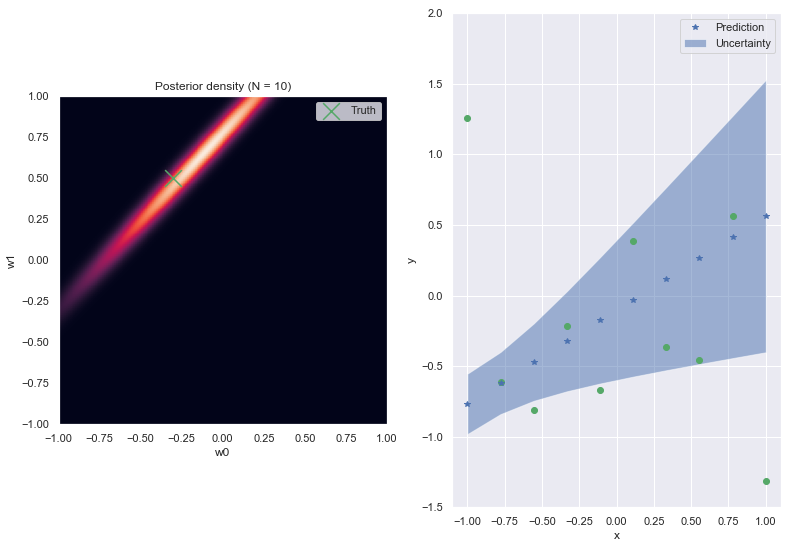

In [252]:

pr_mean = np.zeros(x_train.shape[1]).reshape(2,1)
pr_cov = alpha*np.eye(x_train.shape[1])

pos_mean, pos_cov = posterior(x_train,y_train,beta,pr_mean,pr_cov)

pp_mean, pp_var = posterior_predictive(x_test, pos_mean, pos_cov, beta)
i=0

plt.figure(figsize=(20,20))
plt.subplot(2, 3, i * 3 + 1)
plot_posterior(pos_mean, pos_cov,a,b)
plt.title(f'Posterior density (N = {N})')
plt.grid(False)
plt.legend()


plt.subplot(2, 3, i * 3 + 2)
# plot_data(x_train[:,1], y_train.reshape(-1))
plot_truth(x_test[:,1], y_test.reshape(-1), label=None)
plot_predictive(x_test[:,1], pp_mean, np.sqrt(pp_var))
plt.ylim(-1.5, 2.0)
plt.legend()

In [114]:
np.linalg.inv(x_train.T@x_train)@x_train.T@y_train

array([[-0.29861251],
       [ 0.53220863]])

In [359]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
# y2 = 0.8 * np.sin(4 * np.pi * x)

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=(16, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

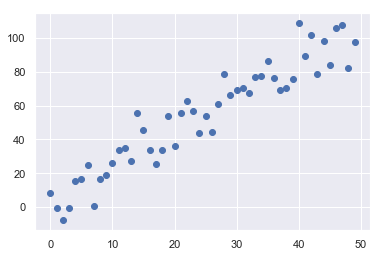

In [430]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [382]:
mean,var = posterior_predictive(x_train,pos_mean,pos_cov,beta)